In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize,stats,special

In [3]:
# plt.style.available
plt.style.use("seaborn-paper")

In [23]:
datadir = "../data/"
key1 = ["Cu","Zn","Fe","Ge","Cr"]
key2 = ['X1',"X2",'X3']
key3 = ['2t','4t','6t','8t','10t']
key4 = ['55Fe']
datasuffix = ".dat.txt"

data1 = {key:np.loadtxt(f'{datadir}{key}{datasuffix}') for key in key1}
data2 = {key:np.loadtxt(f'{datadir}{key}{datasuffix}') for key in key2}
data3 = {key:np.loadtxt(f'{datadir}{key}{datasuffix}') for key in key3}
data4 = {key:np.loadtxt(f'{datadir}{key}{datasuffix}') for key in key4}

channel = np.arange(0,1024)
edge = np.arange(-0.5,1023.5)

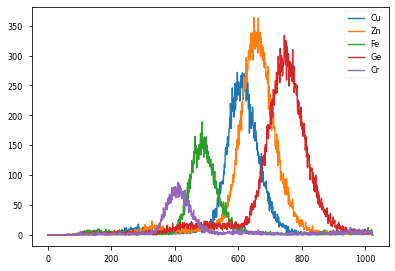

In [14]:
for key in key1:
    plt.plot(channel,data1[key],label = key)
plt.legend()

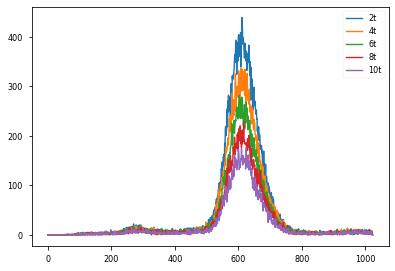

In [17]:
for key in key3:
    plt.plot(channel,data3[key],label = key)
plt.legend()

In [20]:
def gauss_with_norm(x,mean,sigma,norm):
    return stats.norm.pdf(x,loc = mean,scale = sigma) * norm

In [34]:
popt,pvar = optimize.curve_fit(gauss_with_norm,channel,data1['Cu'],p0=[600,10,100])

In [39]:
def gaussian_fit(y,x = channel,p0=None):
    popt,pvar = optimize.curve_fit(gauss_with_norm,x,y,p0=p0)
    return popt

In [35]:
test = gauss_with_norm(channel,mean=popt[0],sigma = popt[1],norm = popt[2])

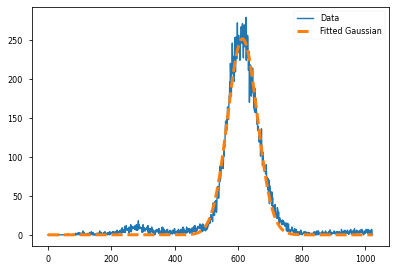

In [43]:
plt.plot(data1['Cu'])
plt.plot(test,"--",linewidth = 3)
plt.legend(["Data","Fitted Gaussian"])

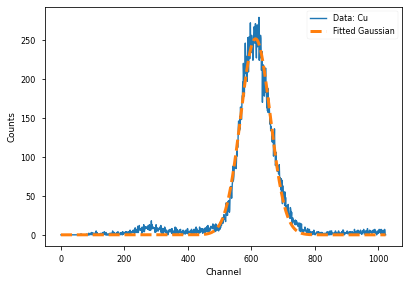

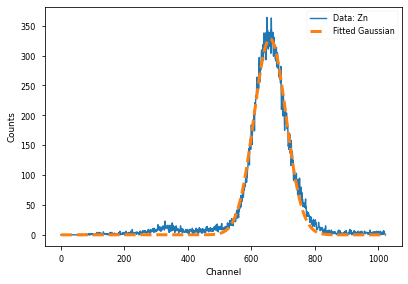

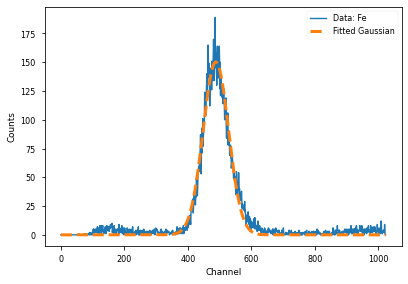

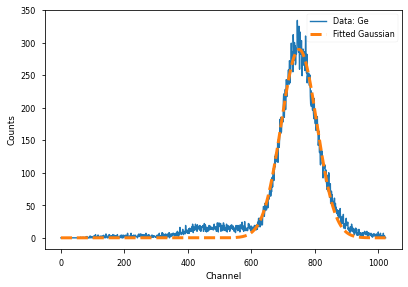

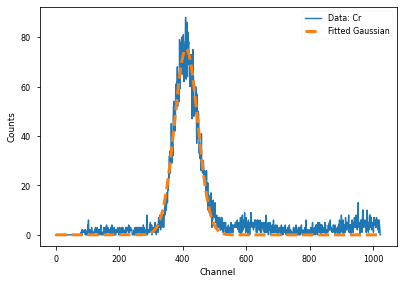

In [49]:
mu1 = {}

for key in key1:
    mu,sigma,norm = gaussian_fit(y=data1[key],p0=[600,10,50])
    tmp = gauss_with_norm(channel,mean=mu,sigma = sigma,norm = norm)
    plt.figure()
    plt.plot(data1[key])
    plt.plot(tmp,"--",linewidth = 3)
    plt.xlabel("Channel")
    plt.ylabel("Counts")
    plt.legend([f"Data: {key}","Fitted Gaussian"])
    mu1[key] = mu

In [50]:
mu1

{'Cu': 613.1718582503914,
 'Zn': 658.9204366331171,
 'Fe': 488.210136888735,
 'Ge': 750.4339841501271,
 'Cr': 410.6951971545783}

In [ ]:
k_alpha = {"Fe":6.403,"Cu":8.047,"Zn":8,638,"Ge":9.885,"Cr":5.414}